# Scikit-Learn SVM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [7]:
X = iris.data
y = iris.target
names = iris.target_names

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
X.shape

(150, 4)

In [8]:
y.shape

(150,)

In [9]:
df = pd.DataFrame(X, columns = iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].replace(to_replace = [0,1,2], value = ['setpsa', 'versicolor', 'virginia'])

In [10]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setpsa
1,4.9,3.0,1.4,0.2,setpsa
2,4.7,3.2,1.3,0.2,setpsa
3,4.6,3.1,1.5,0.2,setpsa
4,5.0,3.6,1.4,0.2,setpsa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginia
146,6.3,2.5,5.0,1.9,virginia
147,6.5,3.0,5.2,2.0,virginia
148,6.2,3.4,5.4,2.3,virginia


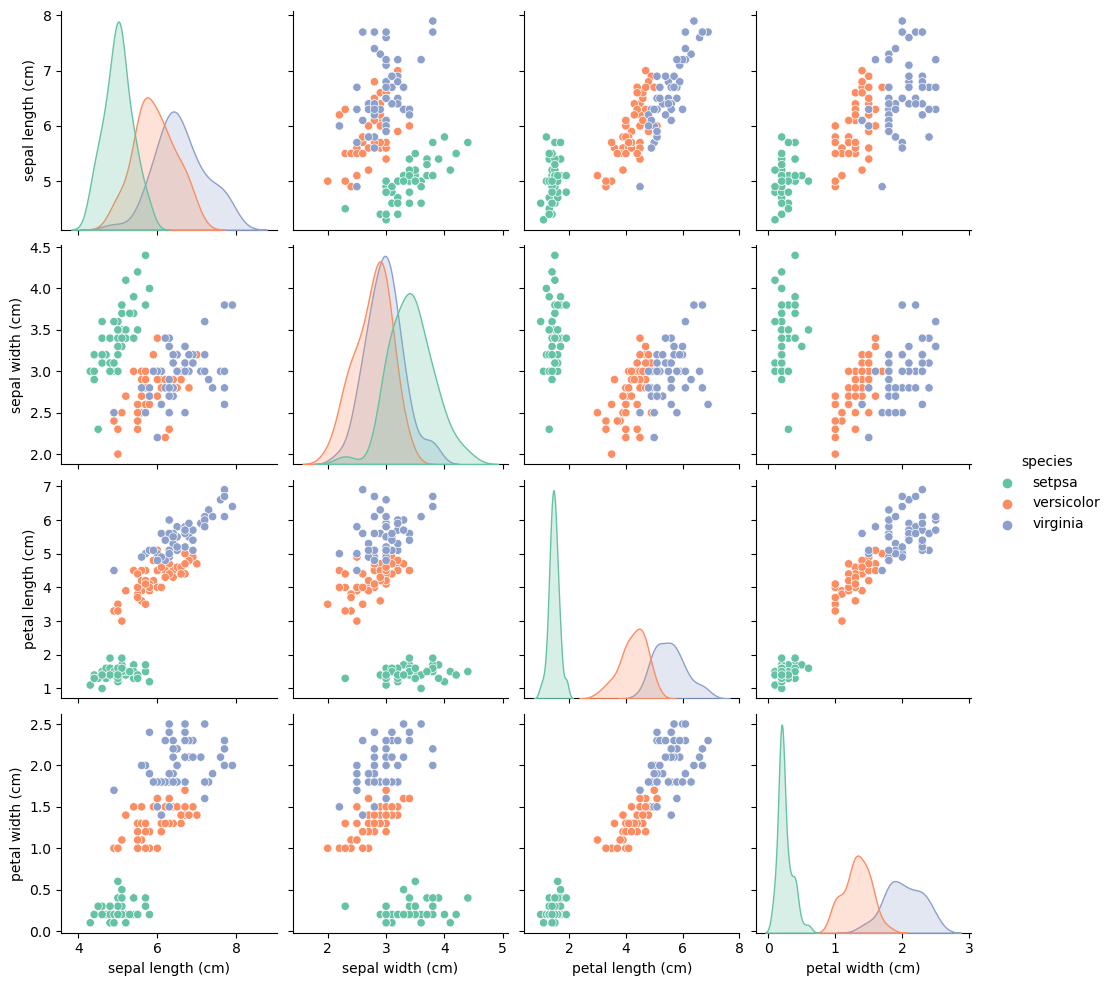

In [12]:
import seaborn as sns
sns.pairplot(data = df, hue = 'species', palette = 'Set2')

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [14]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


In [18]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [19]:
pred = svm.predict(X_test)

In [20]:
pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2])

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

accuracy_score(y_test, pred)

1.0

In [23]:
confusion_matrix(y_test, pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [24]:
rbf_svm = SVC(kernel = 'rbf', random_state = 0)
rbf_svm.fit(X_train, y_train)
rbf_pred = rbf_svm.predict(X_test)

In [25]:
accuracy_score(y_test, rbf_pred)

0.9666666666666667